<a href="https://colab.research.google.com/github/nir6760/MScProjects/blob/main/GMDL_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GMDL , HW 1

**Nir Mualem 205467780**

**Or Cohen Tsemach 207498395**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
#!pip install ipython-autotime

# Part 1

## Computer Exercise 1

In [ ]:
def G(row_s, Temp):
  '''
  input:
  param row_s: a 1D numpy array
  param Temp: a scalar
  output:
  A scalar (see pdf for detailes)
  '''
  return np.exp((1/Temp) * np.sum(row_s[:-1] * row_s[1:]) )

## Computer Exercise 2

In [ ]:
def F(row_s, row_t, Temp):
  '''
  input:
  param row_s: a 1D numpy array
  param row_t: a 1D numpy array
  param Temp: a scalar
  output:
  A scalar (see pdf for detailes)
  '''
  return np.exp((1/Temp) * np.sum(row_s * row_t) )

## Computer Exercise 3

In [ ]:
# Define the values for  Temp
Temp_values = [1, 1.5, 2]
def compute_and_output(ex_num, compute_func, round_num=4):
  # Loop over the Temp values and compute ZTemp for each
  print(f'Computer Exercise number {ex_num}:')
  for Temp in Temp_values:
      ZTemp = compute_func(Temp)
      print(f'ZTemp for Temp={Temp}: {round(ZTemp,round_num)}')

In [ ]:
# Define the values for xs
xs_values = [-1, 1]


# Function to compute ZTemp for a given Temp, 2*2 lattice (first method)
def compute_ZTemp3(Temp):
  '''
  input:
  Temp: a scalar
  output:
  A scalar (calculate ZTemp)
  '''
  ZTemp = 0
  for x11 in xs_values:
      for x12 in xs_values:
          for x21 in xs_values:
              for x22 in xs_values:
                  ZTemp += np.exp((1/Temp)*(x11*x12+x11*x21+x12*x22+x21*x22))
  return ZTemp

compute_and_output(3, compute_ZTemp3)

Computer Exercise number 3:
ZTemp for Temp=1: 121.2329
ZTemp for Temp=1.5: 40.9228
ZTemp for Temp=2: 27.0488


## Computer Exercise 4

In [ ]:
# Function to compute ZTemp for a given Temp, 3*3 lattice (first method)
def compute_ZTemp4(Temp):
  '''
  input:
  Temp: a scalar
  output:
  A scalar (calculate ZTemp)
  '''
  ZTemp = 0
  for x11 in xs_values:
    for x12 in xs_values:
      for x13 in xs_values:
        for x21 in xs_values:
          for x22 in xs_values:
            for x23 in xs_values:
              for x31 in xs_values:
                for x32 in xs_values:
                  for x33 in xs_values:
                          ZTemp += np.exp((1/Temp)*(x11*x12 + x11*x21
                                                  + x12*x13 + x12*x22
                                                  + x13*x23
                                                  + x21*x22 + x21*x31
                                                  + x22*x23 + x22*x32
                                                  + x23*x33
                                                  + x31*x32
                                                  + x32*x33))
  return ZTemp

compute_and_output(4, compute_ZTemp4)

Computer Exercise number 4:
ZTemp for Temp=1: 365645.7491
ZTemp for Temp=1.5: 10565.422
ZTemp for Temp=2: 2674.5181


## Computer Exercise 5

In [ ]:
!python --version

Python 3.10.11


In [ ]:
def y2row(y,width=8):
  '''
  y: an integer in (0,...,(2**width)-1)
  '''
  if not 0<=y<=(2**width)-1:
    raise ValueError(y)
  my_str=np.binary_repr(y,width=width)
  # my_list = map(int,my_str) # Python 2
  my_list = list(map(int,my_str)) # Python 3
  my_array = np.asarray(my_list)
  my_array[my_array==0]=-1
  row=my_array
  return row


In [ ]:
# Function to compute ZTemp for a given Temp, 2*2 lattice (second method)
def compute_ZTemp5(Temp):
  '''
  input:
  Temp: a scalar
  output:
  A scalar (calculate ZTemp)
  '''
  # Define the values for ys
  ys_values = range(np.power(2,2))
  ZTemp=0
  width=2
  for y1_val in ys_values:
      for y2_val in ys_values:
          y1 = y2row(y1_val, width)
          y2 = y2row(y2_val, width)
          ZTemp+= G(y1, Temp) * G(y2, Temp) * F(y1, y2, Temp)
  return ZTemp

compute_and_output(5, compute_ZTemp5)


Computer Exercise number 5:
ZTemp for Temp=1: 121.2329
ZTemp for Temp=1.5: 40.9228
ZTemp for Temp=2: 27.0488


## Computer Exercise 6

In [ ]:
# Function to compute ZTemp for a given Temp, 3*3 lattice (second method)
def compute_ZTemp6(Temp):
  '''
  input:
  Temp: a scalar
  output:
  A scalar (calculate ZTemp)
  '''
  # Define the values for ys
  ys_values = range(np.power(2,3))
  ZTemp=0
  width=3
  for y1_val in ys_values:
      for y2_val in ys_values:
          for y3_val in ys_values:
              y1 = y2row(y1_val, width)
              y2 = y2row(y2_val, width)
              y3 = y2row(y3_val, width)
              ZTemp+= G(y1, Temp) * G(y2, Temp) * G(y3, Temp) \
              * F(y1, y2, Temp) * F(y2, y3, Temp)
  return ZTemp

compute_and_output(6, compute_ZTemp6)

Computer Exercise number 6:
ZTemp for Temp=1: 365645.7491
ZTemp for Temp=1.5: 10565.422
ZTemp for Temp=2: 2674.5181


## Computer Exercise 7 implementation

In [ ]:
# forward

def calcGsArr(width, Temp, y_max_val):
  # G[0], G[1], ..., G[255]
    Gs_arr=np.zeros(y_max_val)
    for y_val in range(y_max_val):
        y = y2row(y_val,width)
        Gs_arr[y_val]=G(y, Temp)
    return Gs_arr

def calcFsArr(width, Temp, y_max_val):
  # rows are y_k vals
  # columns are y_(k+1) vals
    Fs_arr = np.zeros((y_max_val, y_max_val))
    for y_curr_val in range(y_max_val):
      for y_next_val in range(y_max_val):
        Fs_arr[y_curr_val, y_next_val] = \
        F(y2row(y_curr_val,width),y2row(y_next_val,width),Temp)
    return Fs_arr

def calcTk(k_minus_one, y_max_val, Ts_arr, Gs_arr, Fs_arr):
    Tk_arr = np.zeros(y_max_val)
    for y_val in range(y_max_val):
        Tk_arr[y_val] = np.sum(Ts_arr[k_minus_one] * Gs_arr * Fs_arr[:,y_val])
    return Tk_arr

def calcLast(k_minus_one, Ts_arr, Gs_arr):
    ZTemp = 0
    ZTemp = np.sum(Ts_arr[k_minus_one] * Gs_arr)
    return ZTemp

def calcTs(width, Gs_arr, Fs_arr, y_max_val):
    Ts_arr = np.zeros((width, y_max_val))
    ZTemp = 0 # last T : T_width
    Ts_arr[0] = np.ones(y_max_val)
    for t_ind in range(1, width):
      Ts_arr[t_ind] = calcTk(t_ind-1 ,y_max_val, Ts_arr, Gs_arr, Fs_arr)
    ZTemp = calcLast(width-1, Ts_arr, Gs_arr)
    return Ts_arr, ZTemp

def forward(width, Temp,  Gs_arr, Fs_arr, y_max_val):
    Ts_arr, ZTemp = calcTs(width, Gs_arr, Fs_arr, y_max_val)
    return Ts_arr, ZTemp

In [ ]:
# backward

def calcPLastArr(k, Ts_arr, Gs_arr, Fs_arr, ZTemp, y_max_val):
    p_last = Ts_arr[k-1] * Gs_arr
    p_last = p_last / ZTemp
    return p_last

def calcCondPArr(k, Ts_arr, Gs_arr, Fs_arr, y_max_val):
    cond_p = np.zeros((y_max_val, y_max_val))
    # iterate over y_(k+1)
    for y_val in range(y_max_val):
        cond_p[y_val] = Ts_arr[k-1] * Gs_arr * Fs_arr[:,y_val]
        cond_p[y_val] = cond_p[y_val] / Ts_arr[k,y_val]
    return cond_p

def backward(width , Ts_arr, Gs_arr, Fs_arr, ZTemp, y_max_val):
    lastP = calcPLastArr(width, Ts_arr, Gs_arr, Fs_arr, ZTemp, y_max_val) # p_width
    condP_arr = np.zeros((width, y_max_val, y_max_val))
    for cond_p_ind in range(1, width):
        condP_arr[cond_p_ind] = calcCondPArr(cond_p_ind, Ts_arr, Gs_arr, Fs_arr, y_max_val)
    return condP_arr, lastP

In [ ]:
# full algorithm
# Function to calculate conditional all requested probabilisites for sampling
def fullCalculation(width, Temp):
    y_max_val = np.power(2,width)
    Gs_arr = calcGsArr(width, Temp, y_max_val)
    Fs_arr = calcFsArr(width, Temp, y_max_val)
    Ts_arr, ZTemp = forward(width, Temp,  Gs_arr, Fs_arr, y_max_val)
    condP_arr, lastP = backward(width , Ts_arr, Gs_arr, Fs_arr, ZTemp, y_max_val)
    return condP_arr, lastP

In [ ]:
# Function to calculate to sample image sized width*width
def sampleLattice(width, condP_arr, lastP):
  y_arr = np.zeros(width+1, dtype=int)
  y_max_val = np.power(2,width)
  range_y_max_val = range(y_max_val)
  y_arr[width] = np.random.choice(range_y_max_val,p=lastP)
  for i in range(width-1, 0, -1):
    y_arr[i] = np.random.choice(range_y_max_val,p=condP_arr[i,y_arr[i+1]])
  return y_arr

# Function to calculate to sample num_images of images sized width*width
def sampleImages(num_images, width, condP_arr, lastP):
  images_lst = []
  for i in range(num_images):
    images_lst.append(sampleLattice(width, condP_arr, lastP))
  return images_lst

# Function to convert the sampled image of 8 entries (8uint representation) to width*width representation
def imageY2Row(image):
  width = image.shape[0]
  view_image = np.zeros((width, width), dtype=int)
  for i in range(width):
    view_image[i] =  y2row(image[i], width)
  return view_image

# Function to plot the images for computer exercise 7
def plot_images(dict_images, TempLst, figsize=(20,15)):
  num_of_images_per_row = len(dict_images[TempLst[0]])
  num_of_images_per_col = len(TempLst)
  fig,axs=plt.subplots(num_of_images_per_col,num_of_images_per_row, figsize=figsize)
  fig.suptitle("Computer Exercise 7:\nSampled lattices based on $T\in\{1, 1.5 , 2\}$")
  plt.figure(dpi=80)
  iter = 0
  for key, value in dict_images.items():
    for i,img in enumerate(value):
      view_image = imageY2Row(img)
      axs[iter,i].imshow(view_image[1:,1:],vmax=1,vmin=-1,interpolation="None", cmap='gray')
    axs[iter, 0].set_title(f'Temperature {key}:')
    iter= iter + 1
  fig.tight_layout()
  plt.subplots_adjust(wspace=1.1, hspace=1.1)
  plt.show()

### **Problem 1**


The student likely encountered a programming bug related to integer division in Python 2. In Python 2, dividing integers results in an integer, truncating the fractional part. This is different from Python 3, where dividing integers results in a float. <br>
The command 'python2 -c "print [1/Temp for Temp in [1,1.5,2]]"' would output [1, 0.66..., 0], indicating that F and G outputs for Temp = 2 were 1. This creates a uniform probability distribution, resulting in a random-looking distribution for Temp = 2. Therefore, the student was likely not sampling from the Ising model, but from a uniform distribution with no observable patterns.

## Computer Exercise 8 implementation

In [ ]:
# Function to calculate empirical mean for computer exercise 8
def sampleMeans(num_samples, width, condP_arr, lastP,
                pose1, pose2, pose3):
    #specific_x_values = np.zeros((3,num_samples), dtype=int)
    e1 = 0
    e2 = 0
    for i in range(num_samples):
        y_arr = sampleLattice(width, condP_arr, lastP)
        # specific_x_values[0, i] = y2row(y_arr[pose1[0]], width)[pose1[1]-1] # x11
        # specific_x_values[1, i] = y2row(y_arr[pose2[0]], width)[pose2[1]-1] # x22
        # specific_x_values[2, i] = y2row(y_arr[pose3[0]], width)[pose3[1]-1]# x88
        x11 = y2row(y_arr[pose1[0]], width)[pose1[1]-1] # x11
        x22 = y2row(y_arr[pose2[0]], width)[pose2[1]-1] # x22
        x88 = y2row(y_arr[pose3[0]], width)[pose3[1]-1] # x88
        e1 = ((i) * e1 + x11*x22)/(i+1)
        e2 = ((i) * e2 + x11*x88)/(i+1)
    # x11 * x22
    #e1 = np.sum(specific_x_values[0, :] * specific_x_values[1, :]) / num_samples
    # x11 * x88
    #e2 = np.sum(specific_x_values[0, :] * specific_x_values[2, :]) / num_samples
    return e1, e2

In [ ]:
# Functions to get the outputs of computer exercised 7 and 8
def sampleImagesAndEmpricalMean(num_images, num_samples_for_mean,
                                width, TempLst,pose1, pose2, pose3):
  means_dict ={}
  images_per_temp_dict = {}
  for temp in TempLst:
        condP_arr, lastP = fullCalculation(width, temp)
        images_per_temp_dict[temp] = \
        sampleImages(num_images, width, condP_arr, lastP)
        images_lst = sampleImages(num_images, width, condP_arr, lastP)
        e1, e2 = sampleMeans(num_samples_for_mean, width, condP_arr, lastP,
                      pose1, pose2, pose3)
        means_dict[temp] = (e1, e2)

  return means_dict, images_per_temp_dict

pose1 = (1,1)
pose2 = (2,2)
pose3 = (8,8)
%time means_dict, images_per_temp_dict = sampleImagesAndEmpricalMean(10, 10000, 8,Temp_values,pose1, pose2, pose3)



CPU times: user 19.7 s, sys: 572 ms, total: 20.3 s
Wall time: 22.6 s


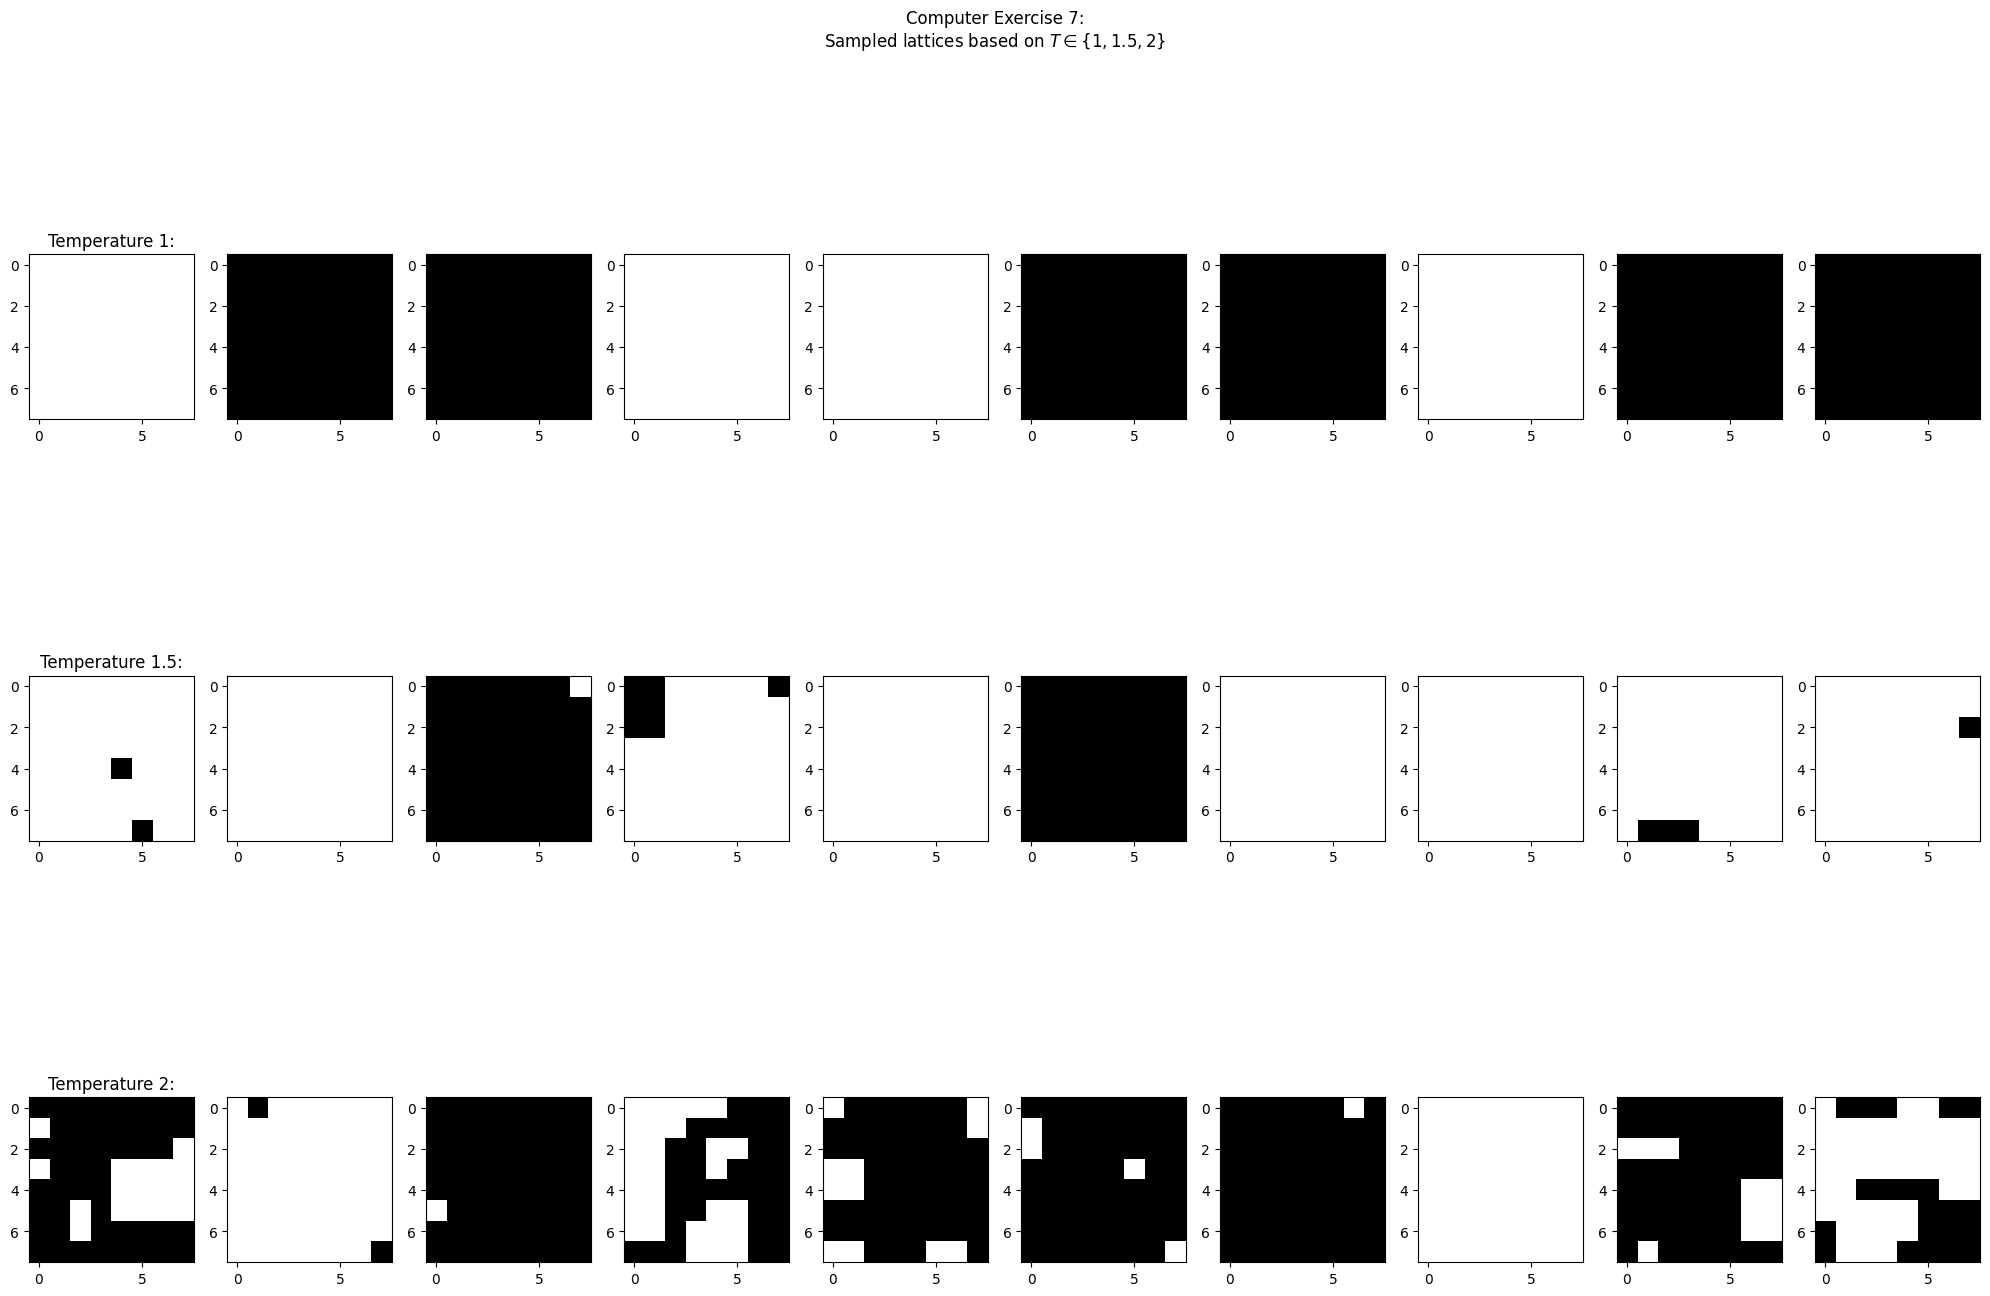

<Figure size 512x384 with 0 Axes>

In [ ]:
plot_images(images_per_temp_dict, Temp_values) # attached to the report

In [ ]:
def print_empirical_means(means_dict, round_num=4):
  print("Computer Exercise 8:\n")
  for key, value in means_dict.items():
    print(f'Temperature {key}:')
    print(f"emprical_mean(X({pose1[0]},{pose1[1]})X({pose2[0]},{pose2[0]})) = ", round(value[0], round_num))
    print(f"emprical_mean(X({pose1[0]},{pose1[1]})X({pose3[0]},{pose3[1]})) = ", round(value[1], round_num))
    print()
print_empirical_means(means_dict)

Computer Exercise 8:

Temperature 1:
emprical_mean(X(1,1)X(2,2)) =  0.9566
emprical_mean(X(1,1)X(8,8)) =  0.914

Temperature 1.5:
emprical_mean(X(1,1)X(2,2)) =  0.7612
emprical_mean(X(1,1)X(8,8)) =  0.5542

Temperature 2:
emprical_mean(X(1,1)X(2,2)) =  0.509
emprical_mean(X(1,1)X(8,8)) =  0.1172



### **Problem 2**

At Temp=1:<br>
* $\hat{E}_{\text{Temp}}[x_{(1,1)}x_{(2,2)}]\approx0.95$ , $ \hat{E}_{\text{Temp}}[x_{(1,1)}x_{(8,8)}]\approx0.9$ <br>
* The difference in the emprical means is due to the spatial distance between the two vertices in eac emprical mean. Since the temperature remains constant, when they are farther apart from each other, the probability of both of them to agree decreases. However, because the temperature is low, the difference here is negligible.<br>

At Temp=1.5:<br>
* $\hat{E}_{\text{Temp}}[x_{(1,1)}x_{(2,2)}]\approx0.76$ , $\hat{E}_{\text{Temp}}[x_{(1,1)}x_{(8,8)}]\approx0.54$<br>
* The probabilities have decreased compared to the previous temperature. As the temperature rose, more non-uniform lattices emerged. As their distance increases, their probability of agreement between them decreases. Therefore, we can see that the random variables with high spatial distance $x_{(1,1)}x_{(8,8)}$ agree far less than those with low spatial distance $x_{(1,1)}x_{(2,2)}$.<br>

At Temp=2:<br>
* $\hat{E}_{\text{Temp}}[x_{(1,1)}x_{(2,2)}]\approx0.5$ , $\hat{E}_{\text{Temp}}[x_{(1,1)}x_{(8,8)}]\approx0.12$
* Similar as before, with a temperature of 2, the probability of chaotic structures emerging increases further. As a result, as the spatial distance between the vertices increases, the probability of $x_{(1,1)}x_{(8,8)}$ agreeing decreases even more. We can also observe that the estimated mean for $x_{(1,1)}x_{(8,8)}$ is close to zero, which means that because they are so far apart and the temperature is so high, they have almost no dependence on each other.

|  Temperature              | $\hat{E}_{\text{Temp}}[x_{(1,1)}x_{(2,2)}]$ | $ \hat{E}_{\text{Temp}}[x_{(1,1)}x_{(8,8)}]$ |
| :---------------- | :------: | ----: |
| $1$        |   $\approx0.95$   | $\approx0.9$ |
| $1.5$           |   $\approx0.76$   | $\approx0.54$ |
| $2$    |  $\approx0.5$  | $\approx0.12$ |

# Part 2 MCMC


## Computer Exercise 9

In [ ]:
def gibbsSweep(last_l,Temp,n, choices):
    last_round_l = last_l
    for i in  range(1,n+1):# raster-scan
        for j in range(1,n+1):
          # summing all the neighbors, Bernoulli probability for x_s=1, N, S, E, W
            neighbors = last_round_l[i+1,j]+last_round_l[i-1,j]+last_round_l[i,j+1]+last_round_l[i,j-1]
            exp = np.exp((1/Temp) * neighbors)
            z = np.exp((1/Temp) * neighbors) + np.exp((-1/Temp)*neighbors)
            # p(X_s=1)
            bernoulli_param = (1/z) * exp
            # 1, -1
            #last_round_l[i,j] = np.random.binomial(1,bernoulli_param)*2-1
            last_round_l[i,j] = np.random.choice(choices, 1, p=[1-bernoulli_param, bernoulli_param])
    return last_round_l

### Method 1

In [ ]:
# Creates lattice by method 1
def generateLatticeGibbs(Temp,n,sweeps_num):
    choices = np.array([-1,1])
    curr_l = np.zeros((n+2,n+2))
    curr_l[1:-1,1:-1] = np.random.randint(low=0,high=2,size=(n,n))*2-1
    for i in range(sweeps_num):
        curr_l = gibbsSweep(curr_l, Temp, n, choices)
    return curr_l

# Gets samples after using method 1
def getMeansMethod1(sweeps_num ,num_samples, Temp,
                pose1, pose2, pose3, n):
    e1 = 0
    e2 = 0
    for i in range(num_samples):
        lattice_m1 = generateLatticeGibbs(Temp,n, sweeps_num)
        x11 = lattice_m1[pose1[0],pose1[0]] # x11
        x22 = lattice_m1[pose2[0],pose2[1]] # x22
        x88 = lattice_m1[pose3[0],pose3[0]] # x88
        e1 = ((i) * e1 + x11*x22)/(i+1)
        e2 = ((i) * e2 + x11*x88)/(i+1)
    return e1, e2

### Method 2

In [ ]:
# Gets samples after using method 2
def getMeansMethod2(sweeps_num , burn_out, Temp,
                      pose1, pose2, pose3, n):
    choices = np.array([-1,1])
    using_samples_num = sweeps_num-burn_out
    lattice_m2 = np.zeros((n+2,n+2))
    # 1, -1
    lattice_m2[1:-1,1:-1] = np.random.randint(low=0,high=2,size=(n,n))*2-1
    e1 = 0
    e2 = 0
    for i in range(sweeps_num):
        lattice_m2 = gibbsSweep(lattice_m2,Temp,n, choices)
        if i >= burn_out:
          ind = i - burn_out
          x11 = lattice_m2[pose1[0],pose1[0]] # x11
          x22 = lattice_m2[pose2[0],pose2[1]] # x22
          x88 = lattice_m2[pose3[0],pose3[0]] # x88
          e1 = ((ind) * e1 + x11*x22)/(ind+1)
          e2 = ((ind) * e2 + x11*x88)/(ind+1)
    return e1, e2

## Computer Exercise 9 outputs

In [ ]:
def print_empirical_means_part2(TempLst, method1_flag, round_num=4):
  pose1 = (1,1)
  pose2 = (2,2)
  pose3 = (8,8)
  n = 8
  if method1_flag:
    sweeps_num = 25
    param2 = 10000 # num of samples
    num_samples = param2
    method_func = getMeansMethod1
    title_str = 'Method 1 (Independent Samples)'
  else:
    sweeps_num = 25000
    param2 = 100 # burn out
    num_samples = sweeps_num - param2
    method_func = getMeansMethod2
    title_str = 'Method 2 (Ergodicity)'
  print(f'{title_str}:')
  print()
  for temp in TempLst:
    e1, e2 = method_func(sweeps_num ,param2, temp,
                pose1, pose2, pose3, n)
    print(f'Temperature {temp}:')
    print(f"emprical_mean(X({pose1[0]},{pose1[1]})X({pose2[0]},{pose2[0]})) = ", round(e1, round_num))
    print(f"emprical_mean(X({pose1[0]},{pose1[1]})X({pose3[0]},{pose3[0]})) = ", round(e2, round_num))
    print()



In [ ]:
print_empirical_means_part2(Temp_values, True)

Method 1 (Independent Samples):



KeyboardInterrupt: ignored

In [ ]:
print_empirical_means_part2(Temp_values, False)

### **Problem 3**

The main difference between the independent and ergodic approaches is their ability to capture the joint distribution of random variables with high spatial distance. The ergodic approach succeeds in doing so, while the independent approach fails. This is due to the number of iterations: $25$ iterations are enough for capturing the joint distribution of closely located variables (as $x_{(1,1)}$ and $x_{(2,2)}$), but $25k$ iterations are required for variables with significant spatial distance (as $x_{(1,1)}$ and $x_{(8,8)}$). As a result, the independent approach is far less accurate in comparing $x_{(1,1)}$ and $x_{(8,8)}$ but succeeds in comparing $x_{(1,1)}$ and $x_{(2,2)}$, whereas the ergodic approach succeeds in both cases.<br/>
As the temperature increases, the same speculation remains valid. The ergodic approach, with $25k$ sweeps, excels in capturing high spatial distance. Consequently, it appears to be superior to method1 (Independent Sampling with 25 sweeps at each sample). Furthermore, considering that at high temperatures, spatially distant variables like $x_{(1,1)}$ and $x_{(8,8)}$ exhibit minimal dependence on each other, it follows that $ \hat{E}_{\text{Temp}}[x_{(1,1)}x_{(8,8)}]$ is close to zero regardless of the method.

|  Method1: Independent Samples </br> $\text{Temperature}$             | $\hat{E}_{\text{Temp}}[x_{(1,1)}x_{(2,2)}]$| $ \hat{E}_{\text{Temp}}[x_{(1,1)}x_{(8,8)}]$|
| :---------------- | :------: | ----: |
| $1$        |   $\approx0.93$   | $\approx 0.52$ |
| $1.5$           |   $\approx0.74$   | $\approx0.37$ |
| $2$    |  $\approx0.51$  | $\approx0.2$ |
&nbsp;

|  Method2: Ergodicity </br> $\text{Temperature}$              | $\hat{E}_{\text{Temp}}[x_{(1,1)}x_{(2,2)}]$| $ \hat{E}_{\text{Temp}}[x_{(1,1)}x_{(8,8)}]$|
| :---------------- | :------: | ----: |
| $1$        |   $\approx0.95$   | $\approx0.9$ |
| $1.5$           |   $\approx0.78$   | $\approx0.55$ |
| $2$    |  $\approx0.52$  | $\approx0.12$ |

&nbsp;

|  Method 3: DP (Part1) </br> $\text{Temperature}$              | $\hat{E}_{\text{Temp}}[x_{(1,1)}x_{(2,2)}]$| $ \hat{E}_{\text{Temp}}[x_{(1,1)}x_{(8,8)}]$|
| :---------------- | :------: | ----: |
| $1$        |   $\approx0.95$   | $\approx0.9$ |
| $1.5$           |   $\approx0.76$   | $\approx0.54$ |
| $2$    |  $\approx0.5$  | $\approx0.12$ |


The differences between the ergodic approach and exact sampling are minimal. However, independent sampling significantly deviates from exact sampling due to limited iterations, hindering its ability to capture dependencies with high spatial distance accurately. In contrast, the other methods, which are utilizing dynamic programming or more iterations on a single lattice, excel in capturing these dependencies. Therefore, based on the results, it can be concluded that for the Ising model, sampling once and iteratively updating the lattice produces better outcomes.

## Computer Exercise 10

In [ ]:
# step 2
def addNoise(x, n, var):
  eta = var * np.random.standard_normal(size=(n,n))
  x[1:-1,1:-1] = x[1:-1,1:-1] + eta
  return x

# step 3
def gibbsPosteriorSweep(last_l,Temp,n, y, choices, var_sq):
    last_round_l = last_l
    for i in  range(1,n+1):# raster-scan
        for j in range(1,n+1):
          # summing all the neighbors, Bernoulli probability for x_s=1, N, S, E, W
            neighbors = last_round_l[i+1,j]+last_round_l[i-1,j]+last_round_l[i,j+1]+last_round_l[i,j-1]
            prior = (1/Temp) * neighbors
            lh1 = (-1 / (2 * var_sq)) * np.square(y[i, j] - 1)
            lhm1 = (-1 / (2 * var_sq)) * np.square(y[i, j] + 1)
            z = np.exp(prior + lh1) + np.exp((-1)*prior + lhm1)
            # p(X_s|y_s=1)
            bernoulli_param = (1/z) * np.exp(prior + lh1)
            # 1, -1
            #last_round_l[i,j] = np.random.binomial(1,bernoulli_param)*2-1
            last_round_l[i,j] = np.random.choice(choices, 1, p=[1-bernoulli_param, bernoulli_param])
    return last_round_l

# step 4
def ICMSweep(last_l,Temp,n, y, choices, var_sq):
    last_round_l = last_l
    for i in  range(1,n+1):# raster-scan
        for j in range(1,n+1):
          # summing all the neighbors, Bernoulli probability for x_s=1, N, S, E, W
            neighbors = last_round_l[i+1,j]+last_round_l[i-1,j]+last_round_l[i,j+1]+last_round_l[i,j-1]
            prior = (1/Temp) * neighbors
            lh1 = (-1 / (2 * var_sq)) * np.square(y[i, j] - 1)
            lhm1 = (-1 / (2 * var_sq)) * np.square(y[i, j] + 1)
            if prior + lh1 < (-1)*prior + lhm1: # argmax is -1
              last_round_l[i,j] = choices[0]
            else: # argmax is 1
              last_round_l[i,j] = choices[1]
    return last_round_l

def sampleImage(sweeps_num, Temp, n, method_func, noisy_l, var):
    choices = np.array([-1,1])
    curr_l = np.zeros((n+2,n+2))
    curr_l[1:-1,1:-1] = np.random.randint(low=0,high=2,size=(n,n))*2-1
    for i in range(sweeps_num):
        curr_l = method_func(curr_l, Temp, n, noisy_l, choices, np.square(var))
    return curr_l

# step 5
def argmaxML(observations):
    observations[observations>0]=1
    observations[observations<0]=-1
    return observations

In [ ]:
# Function to plot the images for computer exercise 7
def plot_images_part2(TempLst, n, var, figsize=(25,16)):
  num_of_images_per_row = 5
  num_of_images_per_col = len(TempLst)
  fig,axs=plt.subplots(num_of_images_per_col,num_of_images_per_row)
  fig.suptitle("Computer Exercise 10:\nSampled lettices based on $T\in\{1, 1.5 , 2\}$")
  plt.figure(figsize=figsize, dpi=80)
  #plt.rcParams['figure.figsize'] = (12, 8.5)

  iter = 0
  for temp in TempLst:
    # step 1
    x = generateLatticeGibbs(temp,n,sweeps_num=50)
    axs[iter,0].imshow(x, vmax=1,vmin=-1,interpolation="None", cmap='gray')
    axs[iter,0].title.set_text("X")

    # step 2
    y = x.copy()
    y = addNoise(y, n, var)
    axs[iter,1].imshow(y, interpolation="None", cmap='gray')
    axs[iter,1].title.set_text("Y")

    # step 3
    post_image = sampleImage(50, temp, n, gibbsPosteriorSweep, y, var)
    axs[iter,2].imshow(post_image, vmax=1,vmin=-1,interpolation="None", cmap='gray')
    axs[iter,2].title.set_text("Posterior")

    # step 4
    ICM_image = sampleImage(15, temp, n, ICMSweep, y, var)
    axs[iter,3].imshow(ICM_image, vmax=1,vmin=-1,interpolation="None", cmap='gray')
    axs[iter,3].title.set_text("ICM")
    # step 5
    ml = y.copy()
    MLE_image= argmaxML(ml)
    axs[iter,4].imshow(MLE_image,vmax=1,vmin=-1,interpolation="None", cmap='gray')
    axs[iter,4].title.set_text("MLE")

    axs[iter, 0].set_title(f'\nTemperature {temp}:\n X')
    iter= iter + 1
  fig.tight_layout()
  plt.subplots_adjust(wspace=1.2, hspace=1.2)
  plt.show()

In [ ]:
# Function to plot the images for computer exercise 7
def plot_images(dict_images, TempLst, figsize=(20,15)):
  num_of_images_per_row = len(dict_images[TempLst[0]])
  num_of_images_per_col = len(TempLst)
  fig,axs=plt.subplots(num_of_images_per_col,num_of_images_per_row, figsize=figsize)
  fig.suptitle("Computer Exercise 7:\nSampled lattices based on $T\in\{1, 1.5 , 2\}$")
  plt.figure(dpi=80)
  iter = 0
  for key, value in dict_images.items():
    for i,img in enumerate(value):
      view_image = imageY2Row(img)
      #print(view_image)
      axs[iter,i].imshow(view_image,vmax=1,vmin=-1,interpolation="None", cmap='gray')
    axs[iter, 0].set_title(f'Temperature {key}:')
    iter= iter + 1
  fig.tight_layout()
  plt.subplots_adjust(wspace=1.1, hspace=1.1)
  plt.show()

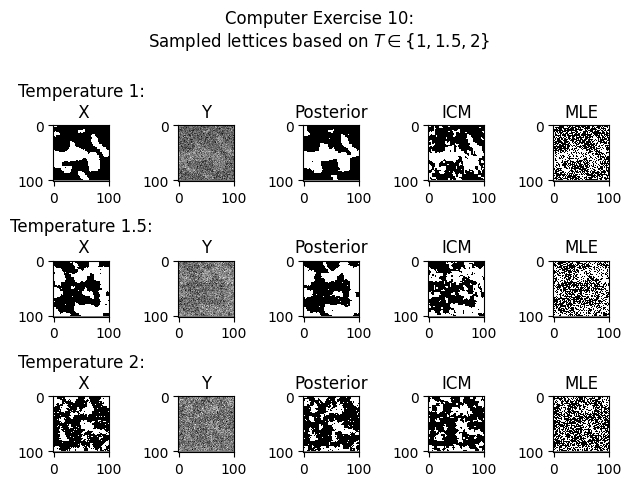

<Figure size 2000x1280 with 0 Axes>

In [ ]:
plot_images_part2(Temp_values, n=100, var=2) # attached to the report

# Exporting to PDF

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
!jupyter nbconvert --to pdf ./drive/MyDrive/Colab_Notebooks/GMDL/GMDL_hw1.ipynb